In [5]:
import numpy as np
import gym
import matplotlib.pyplot as plt


In [28]:
# greedy

def get_epsilon_greedy_action(q_values, epsilon, action_n):
    argmax_action = np.argmax(q_values)
    probs = epsilon * np.ones(action_n) / action_n
    probs[argmax_action] += 1 - epsilon
    action = np.random.choice(np.arange(action_n), p = probs)
    return action

In [31]:
def MonteCarlo(env, episode_n, trajectory_len=500, gamma=0.99):
    total_rewards = []
    
    state_n = env.observation_space.n
    action_n = env.action_space.n
    Q = np.zeros((state_n, action_n))
    N = np.zeros((state_n, action_n))
    
    for episode in range(episode_n):
        epsilon = 1 - episode / episode_n
        trajectory = {'states': [], 'actions': [], 'rewards': []}
        
        state = env.reset()
        for _ in range(trajectory_len):
            trajectory['states'].append(state)
            
            action = get_epsilon_greedy_action(Q[state], epsilon, action_n)
            trajectory['actions'].append(action)
            
            state, reward, done, _ = env.step(action)
            trajectory['rewards'].append(reward)
            
            if done:
                break
                
        total_rewards.append(sum(trajectory['rewards']))
        
        real_trajectory_len = len(trajectory['rewards'])
        returns = np.zeros(real_trajectory_len + 1)
        for t in range(real_trajectory_len - 1, -1, -1):
            returns[t] = trajectory['rewards'][t] + gamma * returns[t + 1]
            
        for t in range(real_trajectory_len):
            state = trajectory['states'][t]
            action = trajectory['actions'][t]
            Q[state][action] += (returns[t] - Q[state][action]) / (1 + N[state][action])
            N[state][action] += 1
            
    return total_rewards
    

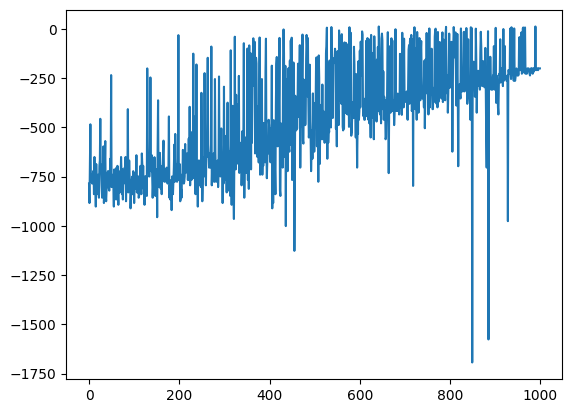

In [32]:
env = gym.make('Taxi-v3')

total_rewards = MonteCarlo(env, episode_n=1000, trajectory_len=1000, gamma=0.99)
plt.plot(total_rewards)
plt.show()

In [ ]:
# SARSA
def SARSA(env, episode_n, t_max=500, gamma=0.99, alpha=0.5):
    total_rewards = []
    
    state_n = env.observation_space.n
    action_n = env.action_space.n
    Q = np.zeros((state_n, action_n))
    epsilon = 1
    
    for episode in range(episode_n):
        epsilon = 1 - episode / episode_n
        
        total_reward = 0
        state = env.reset()
        action = get_epsilon_greedy_action(Q[state], epsilon, action_n)

        for _ in range(t_max):
         
            next_state, reward, done, _ = env.step(action)
            next_action = get_epsilon_greedy_action(Q[next_state], epsilon, action_n)

            total_reward += reward
            
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            state = next_state
            action = next_action
            
            if done:
                break

        total_rewards.append(total_reward)
        epsilon = 1 - episode / episode_n
    
    return total_rewards

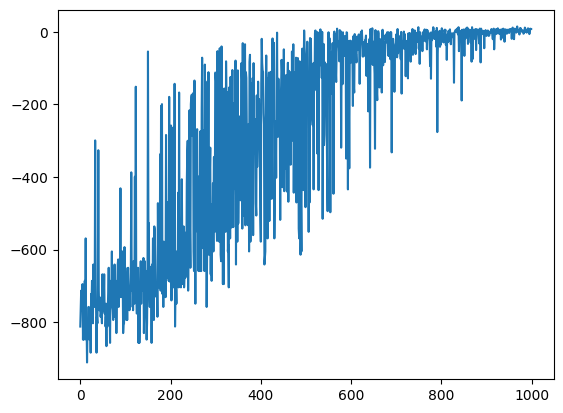

In [37]:
total_rewards = SARSA(env, episode_n=1000, t_max=500, gamma=0.99, alpha=0.5)
plt.plot(total_rewards)
plt.show()